Getting results
Optimal value:  None
[[-0.18272453  0.02927784 -0.02521842 ... -0.03993997 -0.00699562
  -0.08597866]
 [-0.05809727  0.01426973  0.01173709 ... -0.01561575  0.03219832
  -0.08009199]
 [-0.17483095 -0.03164815  0.06672307 ... -0.05389893  0.00898008
   0.07053525]
 ...
 [ 0.05786067  0.14666525 -0.06506406 ... -0.02396441 -0.00986172
  -0.02609813]
 [ 0.0385202   0.02252924  0.0132233  ... -0.03185113  0.02069735
  -0.06450729]
 [ 0.0223386   0.08802383  0.0093688  ... -0.00544248  0.0858149
  -0.04992389]]
[-1.51392592e-02 -2.22921795e-02  1.96495734e-02 -1.89140131e-02
  3.20608718e-03 -3.25252632e-02  1.77297192e-02  2.72389496e-02
 -1.44939613e-05  2.16350501e-02 -1.97394651e-02  8.58068365e-03
 -1.24613318e-02 -1.30712833e-02 -1.41893850e-02 -5.05013093e-03
 -2.65907193e-03 -3.95542151e-03  1.63720574e-02 -1.92946656e-02
  1.75335694e-03  2.46961299e-02  1.34345686e-02 -5.67289741e-03
 -2.43473557e-02 -6.20528295e-03  3.00523154e-02 -2.37405865e-02
  1.14404414e-02 

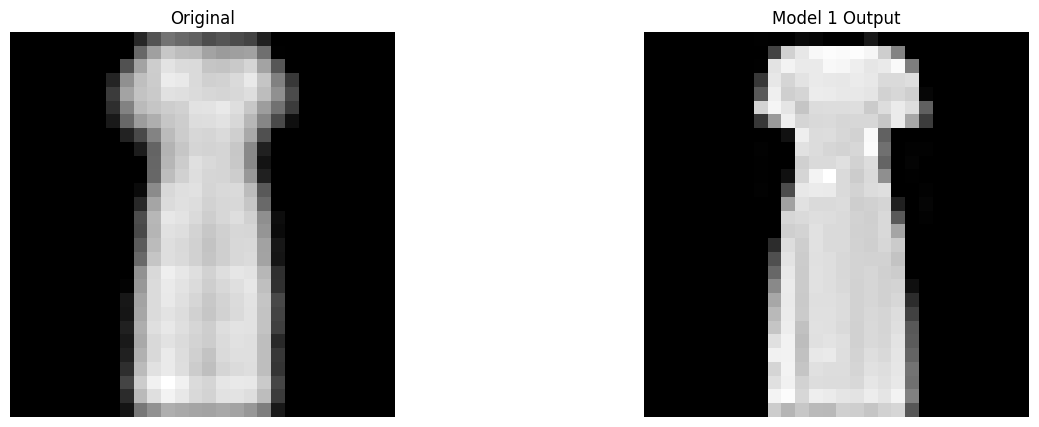

In [7]:
import os
# Change working directory
os.chdir("/Users/federicoferoggio/Documents/vs_code/latent-communication")
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from utils.dataloaders.full_dataloaders import DataLoaderFashionMNIST
from models.definitions.vae import VAE
import numpy as np

from utils.model import get_transformations, load_model
from utils.dataloaders.get_dataloaders import define_dataloader
from utils.get_mapping import load_mapping




# File path to the model
file1 = '/Users/federicoferoggio/Documents/vs_code/latent-communication/models/checkpoints/PCKTAE/FMNIST/FMNIST_PCKTAE_100_3.pth'
file2 = '/Users/federicoferoggio/Documents/vs_code/latent-communication/models/checkpoints/PCKTAE/FMNIST/FMNIST_PCKTAE_100_2.pth'
mapping = "/Users/federicoferoggio/Documents/vs_code/latent-communication/results/transformations/mapping_files/PCKTAE/FMNIST_PCKTAE_100_3>FMNIST_PCKTAE_100_2>Affine_50_0_outliers"
path = 'FMNIST_PCKTAE_100_3.pth'

file = path[:-4]
name_dataset1, name_model1, size_of_the_latent1, seed1 = file.split("_")
images, labels, n_classes = define_dataloader(name_dataset1, name_model1, seed=seed1, use_test_set=False)
name_dataset2, name_model2, size_of_the_latent2, seed2 = file.split("_")
images, labels, n_classes = define_dataloader(name_dataset1, name_model1, seed=seed1, use_test_set=False)
filepath = f"models/checkpoints/PCKTAE/FMNIST/{name_dataset2}_{name_model2}_{size_of_the_latent2}_{seed2}.pth"
model1 = load_model(
    model_name="PCKTAE",
    name_dataset="FMNIST",
    latent_size=100,
    seed=3,
    model_path=file1,
).eval()
model2 = load_model(
    model_name="PCKTAE",
    name_dataset="FMNIST",
    latent_size=100,
    seed=2,
    model_path=file2,
).eval()
# Select an image from the dataset
image = images[50].unsqueeze(0)
latent_1 = model1.get_latent_space(image)
mapping = load_mapping(mapping, "Affine")

mapping.print_results()

latent_1= mapping.transform(latent_1)
image_stiched = model2.decode(latent_1.float())
image_original = model2(image)

# Get the output from the model
with torch.no_grad():
    output1 = model1(image)

print(image.shape)

# Function to reverse the ToTensor transformation
def tensor_to_image(tensor):
    tensor = tensor.squeeze(0)  # Remove batch dimension
    tensor = tensor.mul(255).byte()  # Scale the pixel values back to [0, 255]
    array = tensor.numpy()  # Convert to numpy array
    array = array.reshape(28, 28)  # Reshape to 28x28
    return array

# Display the images
def show_images(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        img = tensor_to_image(img)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.show()

show_images([image_stiched.squeeze(), image.squeeze()], ['Original', 'Model 1 Output'])